In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime
import csv
import math

In [2]:
data = pd.read_csv('Mar30.csv')

In [3]:
Wind_Dir = data['FS_WD'] # degrees
Wind_Spd_mph = data['FS_WS'] #MPH
Act_Dir = data['bearing(deg)'] # degrees
Act_Spd = data['speed(m/s)'] #m/s

In [4]:
def to_mps(mph):
    return mph*(1609.34/3600)

In [5]:
Wind_Spd = to_mps(Wind_Spd_mph)

In [10]:
def calc_alpha(dir_wind,spd_wind,dir_act,spd_act):
    '''
    Takes in direction in degrees and speed in m/s from wind and a moving acitivity
    Finds the angle between their vectors (alpha)
    '''
    rad_wind = (dir_wind-180)*(np.pi/180) # subtract 180 b/c reported direction is where wind is coming FROM
    rad_act = (dir_act)*(np.pi/180) # direction of activity
    
    u1 = spd_wind*np.sin(rad_wind)
    print 'uwind=', u1[45]
    v1 = spd_wind*np.cos(rad_wind)
    print 'vwind=', v1[45]
    u2 = spd_act*np.sin(rad_act)
    print 'uact=', u2[45]
    v2 = spd_act*np.cos(rad_act)
    print 'vact=', v2[45]
    vect1 = np.sqrt(u1**2+u2**2)
    print 'wind vect=',vect1[45]
    vect2 = np.sqrt(v1**2+v2**2)
    print 'act vect=', vect2[45]
    alpha = []
    for i in range(0,len(spd_wind)):
        angle = np.arccos(((u1[i]*v1[i])+(u2[i]*v2[i])) / (vect1[i]*vect2[i]))
        alpha = np.append(angle,alpha)
    return alpha[::-1]

In [11]:
def relative_velocity(v_a,v_w,alpha):
    # from jenni paper
    A = v_a-(v_w*np.cos(alpha)**2)
    B = v_w*np.sin(alpha)**2
    C = np.sqrt(A+B)
    return C

In [12]:
def new_rel_vel(v_a,v_w,alpha):
    # see https://en.wikipedia.org/wiki/Apparent_wind
    return np.sqrt(v_w**2+v_a**2 - (2*v_w*v_a*np.cos(np.pi+alpha))) # notice the pi plus alpha

In [13]:
alpha = calc_alpha(Wind_Dir,Wind_Spd,Act_Dir,Act_Spd) 
v_r = new_rel_vel(Act_Spd,Wind_Spd,alpha) 

uwind= 9.76580217897
vwind= 3.03064142036
uact= -6.09169883733
vact= 0.200574862037
wind vect= 11.5099820557
act vect= 3.03727142252


In [14]:
print Wind_Dir[45]-180, Act_Dir[45]

72.7592083333 271.885835652


In [15]:
print Wind_Spd[45], Act_Spd[45]

10.2252471666 6.095


In [16]:
print alpha[45]

0.623806493247


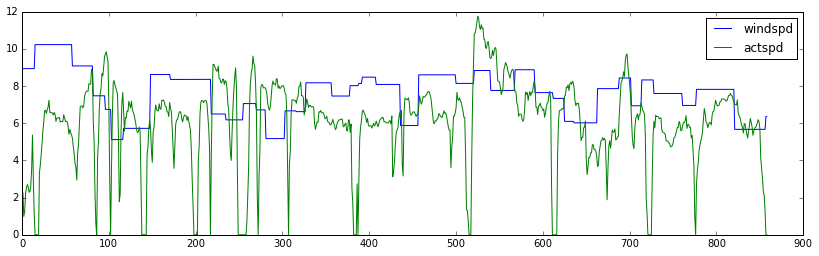

In [23]:
plt.figure(figsize=(14,4))
plt.plot(Wind_Spd,label='windspd')
plt.plot(Act_Spd,label='actspd')
plt.legend()

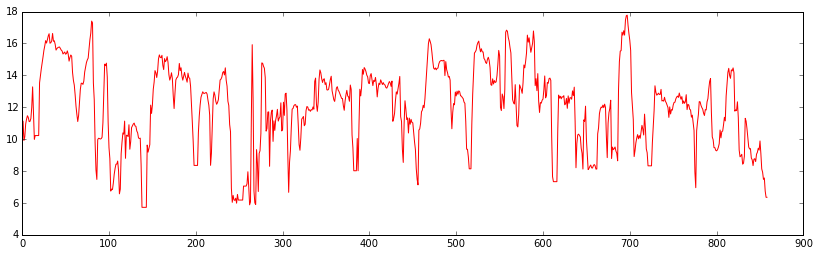

In [24]:
plt.figure(figsize=(14,4))
plt.plot(v_r,c='r')

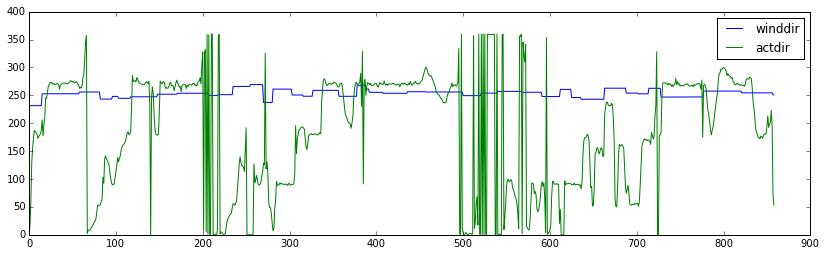

In [25]:
plt.figure(figsize=(14,4))
plt.plot(Wind_Dir,label='winddir')
plt.plot(Act_Dir,label='actdir')
plt.legend()

In [26]:
print v_r.describe()

count    859.000000
mean      11.979547
std        2.550095
min        5.722589
25%       10.239361
50%       12.255552
75%       13.772977
max       17.775685
dtype: float64


In [28]:
print v_r[45]

15.5844406922


In [27]:
np.sqrt(Wind_Spd[45]**2+Act_Spd[45]**2 - (2*Wind_Spd[45]*Act_Spd[45]*np.cos(np.pi-alpha[45])))

15.58444069222492